# MODEL CREATION & EVALUATION SUMMARY:
- Loading pre-process data
- Split training and testing data
- Model creation, prediction & evaluation
- Model saving

# Import necessary libraries

In [148]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score

import catboost as ctb



import warnings # Used to supressed the warnings
warnings.filterwarnings('ignore')


# Loading preprocess data

In [149]:
path_train='Data/train_PreProcess.csv'
path_test='Data/test_PreProcess.csv'
train = pd.read_csv(path_train)
test= pd.read_csv(path_test)

In [150]:
train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Products_Per_Tenure,ActiveCC,Total_Products_Used,Mid_Balance,High_Balance,Geography_Encoded,Gender_Encoded,Credit_category_Encoded,Age_category_Encoded
0,0.146929,-0.554117,-0.726633,-0.869936,0.843648,0.0,-0.968463,1.370927,0,-0.863611,-0.968463,0.843648,-0.35376,-0.542475,0.783032,0.871612,4,2
1,-0.371646,-0.554117,-1.441351,-0.869936,0.843648,0.0,1.032564,-1.265028,0,-1.262366,1.032564,0.843648,-0.35376,-0.542475,0.783032,0.871612,4,2
2,0.273411,0.402563,1.774881,-0.869936,0.843648,0.0,-0.968463,1.439184,0,0.532030,-0.968463,0.843648,-0.35376,-0.542475,0.783032,0.871612,3,3
3,-0.953463,-0.417448,-1.083992,1.503461,-1.044169,0.0,1.032564,-0.564670,0,-0.664234,1.032564,-1.044169,-0.35376,1.843403,0.783032,0.871612,4,2
4,0.754042,-0.554117,-0.011914,-0.869936,0.843648,0.0,1.032564,-1.952945,0,-0.464856,1.032564,0.843648,-0.35376,-0.542475,-0.460093,0.871612,3,2


In [151]:
test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Products_Per_Tenure,ActiveCC,Total_Products_Used,Mid_Balance,High_Balance,Geography_Encoded,Gender_Encoded,Credit_category_Encoded,Age_category_Encoded
0,-0.878176,-1.706504,-1.067887,-0.881274,0.820030,-1.746219,1.009580,0.967874,-1.052504,-0.761515,-0.440063,-0.355474,-0.545592,0.787433,-1.135026,4,0
1,0.329567,0.888990,-1.067887,-0.881274,-1.015806,0.572666,-0.990511,-0.790939,-0.653982,-0.761515,-0.440063,-0.355474,-0.545592,0.787433,-1.135026,3,3
2,-0.006609,-0.465181,0.713922,-0.881274,0.820030,0.572666,-0.990511,0.528413,-0.056199,-0.761515,0.996347,-0.355474,-0.545592,0.787433,-1.135026,4,2
3,0.304665,-0.239486,1.070284,-0.881274,-1.015806,0.572666,-0.990511,0.032150,1.737149,-0.761515,-0.440063,-0.355474,-0.545592,0.787433,0.881037,3,3
4,1.188684,-0.013791,1.783008,1.050038,-1.015806,0.572666,-0.990511,0.539331,2.534193,-0.761515,-0.440063,2.813147,-0.545592,-1.695286,0.881037,1,3


In [152]:
# Just for confirmation
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119317 entries, 0 to 119316
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CreditScore              119317 non-null  float64
 1   Age                      119317 non-null  float64
 2   Tenure                   119317 non-null  float64
 3   Balance                  119317 non-null  float64
 4   NumOfProducts            119317 non-null  float64
 5   HasCrCard                119317 non-null  float64
 6   IsActiveMember           119317 non-null  float64
 7   EstimatedSalary          119317 non-null  float64
 8   Exited                   119317 non-null  int64  
 9   Products_Per_Tenure      119317 non-null  float64
 10  ActiveCC                 119317 non-null  float64
 11  Total_Products_Used      119317 non-null  float64
 12  Mid_Balance              119317 non-null  float64
 13  High_Balance             119317 non-null  float64
 14  Geog

In [153]:
target='Exited'

In [154]:
#Train-Validation data split
X = train.drop(target, axis=1)
y = train[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, shuffle = True, random_state=42)

In [155]:
model=ctb.CatBoostClassifier(iterations=3000,learning_rate=0.06,verbose=300)

In [156]:
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict_proba(X_test)[:,1]

# Evaluation
roc_auc = roc_auc_score(y_test, y_pred) # the evaluation metric

print("ROC AUC Score:", roc_auc)


0:	learn: 0.6327484	total: 26.3ms	remaining: 1m 18s


300:	learn: 0.2938700	total: 5.63s	remaining: 50.5s
600:	learn: 0.2848926	total: 12s	remaining: 48.1s
900:	learn: 0.2775851	total: 17.9s	remaining: 41.7s
1200:	learn: 0.2711025	total: 23.6s	remaining: 35.3s
1500:	learn: 0.2650258	total: 29.2s	remaining: 29.2s
1800:	learn: 0.2592959	total: 34.8s	remaining: 23.2s
2100:	learn: 0.2539603	total: 41.4s	remaining: 17.7s
2400:	learn: 0.2488022	total: 47.3s	remaining: 11.8s
2700:	learn: 0.2440573	total: 53.5s	remaining: 5.92s
2999:	learn: 0.2395125	total: 59.5s	remaining: 0us

 Model : <catboost.core.CatBoostClassifier object at 0x000001CB07DAAA10> 

ROC AUC Score: 0.8896304911450927


In [157]:
model.fit(X, y)

# Predictions
y_pred = model.predict_proba(X)[:,1]

# Evaluation
roc_auc = roc_auc_score(y, y_pred) # the evaluation metric

print("ROC AUC Score:", roc_auc)



0:	learn: 0.6331049	total: 27.2ms	remaining: 1m 21s
300:	learn: 0.2952565	total: 6.64s	remaining: 59.5s
600:	learn: 0.2879651	total: 12.8s	remaining: 51.1s
900:	learn: 0.2818270	total: 19.6s	remaining: 45.6s
1200:	learn: 0.2761400	total: 27s	remaining: 40.4s
1500:	learn: 0.2709791	total: 33.7s	remaining: 33.7s
1800:	learn: 0.2662311	total: 40.7s	remaining: 27.1s
2100:	learn: 0.2615937	total: 47.3s	remaining: 20.2s
2400:	learn: 0.2572179	total: 54.9s	remaining: 13.7s
2700:	learn: 0.2531110	total: 1m 1s	remaining: 6.85s
2999:	learn: 0.2492237	total: 1m 8s	remaining: 0us

 Model : <catboost.core.CatBoostClassifier object at 0x000001CB07DAAA10> 

ROC AUC Score: 0.9319262825113945


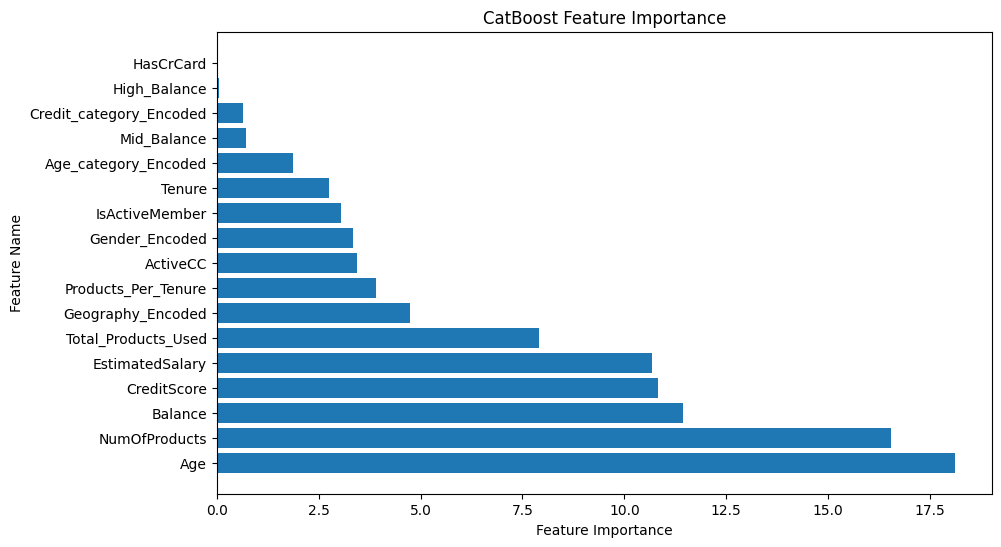

In [158]:
# Get feature importance scores
feature_importance = model.get_feature_importance()

# Get feature names
feature_names = X_train.columns

# Create a dictionary mapping feature names to their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort feature importance scores in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract sorted feature names and importance scores
sorted_feature_names = [item[0] for item in sorted_feature_importance]
sorted_importance_scores = [item[1] for item in sorted_feature_importance]


# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importance_scores)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('CatBoost Feature Importance')
plt.show()


# Model saving

In [159]:
id=pd.read_csv('data/test_id.csv')
test_predictions=model.predict_proba(test)[:,1]

In [160]:
test_predictions = np.where(test_predictions < 0.02, 0, test_predictions)
test_predictions = np.where(test_predictions >= 0.95, 1, test_predictions)
test_predictions

array([0.08227823, 0.75310547, 0.02328918, ..., 0.0250507 , 0.13428431,
       0.10189538])

In [161]:
# Add index to results
predictions_df = pd.DataFrame({'id': id['id'], 'Exited': test_predictions})
predictions_df.head()

,id,Exited
0,165034,0.082278
1,165035,0.753105
2,165036,0.023289
3,165037,0.351065
4,165038,0.326390


In [162]:
predictions_df.to_csv("data/submission/Submission3.csv", index = False)
print("done !")

done !
